<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nr Camere    3529 non-null   int64  
 1   Suprafata    3529 non-null   float64
 2   Etaj         3529 non-null   int64  
 3   Total Etaje  3529 non-null   int64  
 4   Sector       3529 non-null   int64  
 5   Scor         3529 non-null   int64  
 6   Pret         3529 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 193.1 KB
None
         Nr Camere    Suprafata         Etaj  Total Etaje       Sector  \
count  3529.000000  3529.000000  3529.000000  3529.000000  3529.000000   
mean      2.464154    69.812454     3.089544     6.427317     2.936243   
std       0.882514    29.086956     2.733418     3.156608     1.724560   
min       1.000000    16.000000    -1.000000     1.000000     1.000000   
25%       2.000000    52.000000     1.000000     4.000000     1.000000   
50%       2.000

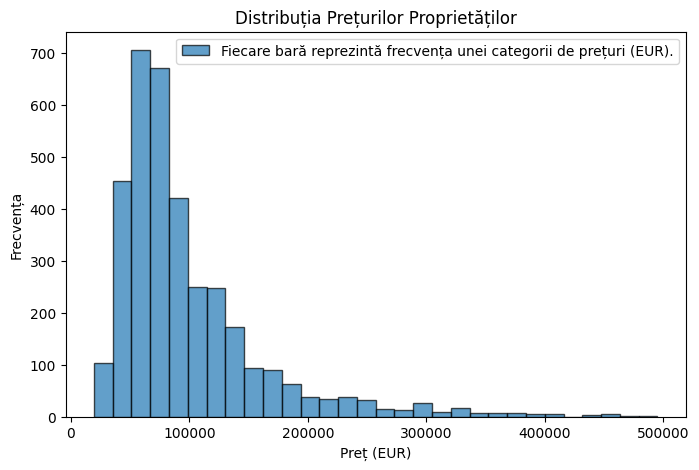

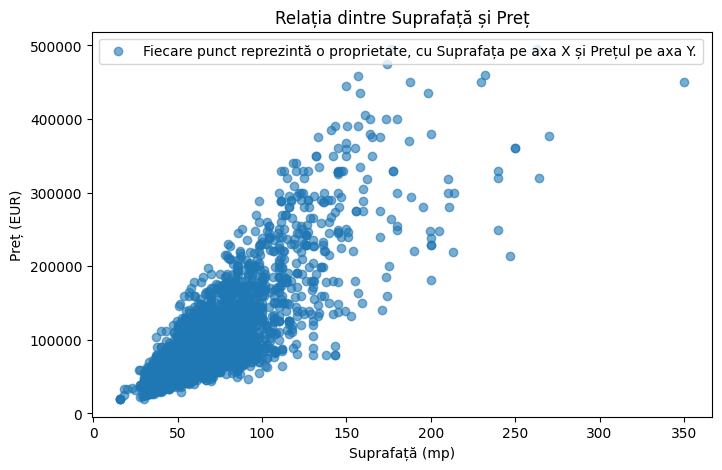

Naive Bayes - RMSE: 48860.26288955041, R2: 0.44757686164189603, Training Time: 0.11253690719604492s
Decision Tree - RMSE: 35311.99734547982, R2: 0.7114607965933681, Training Time: 0.009933710098266602s


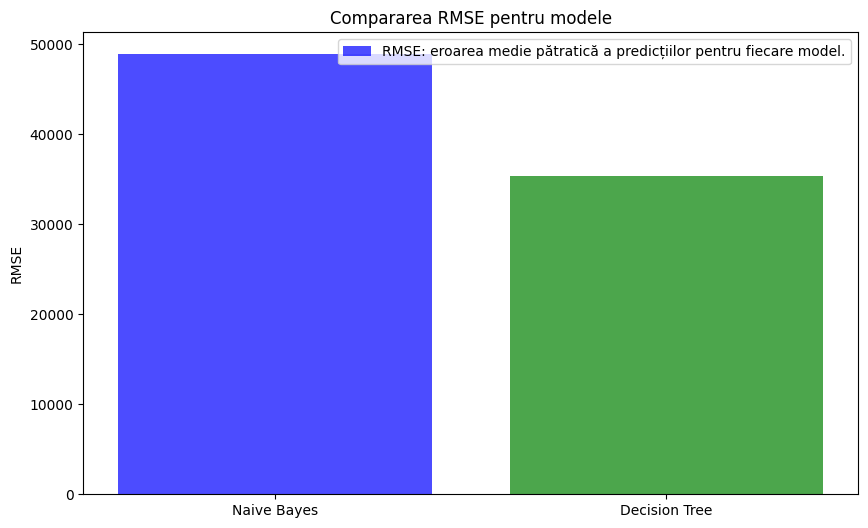

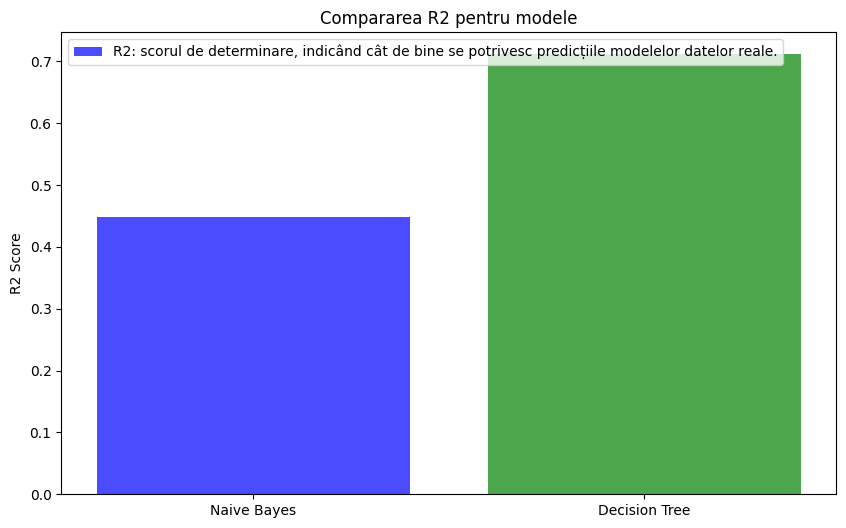

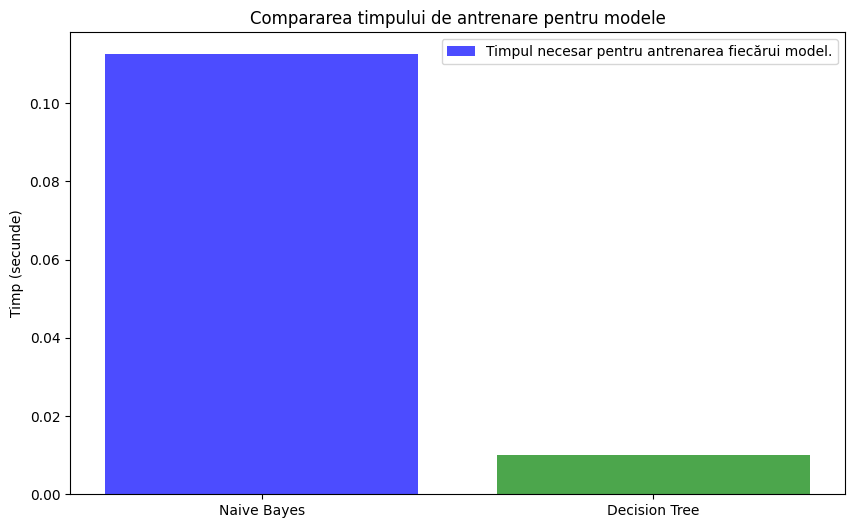

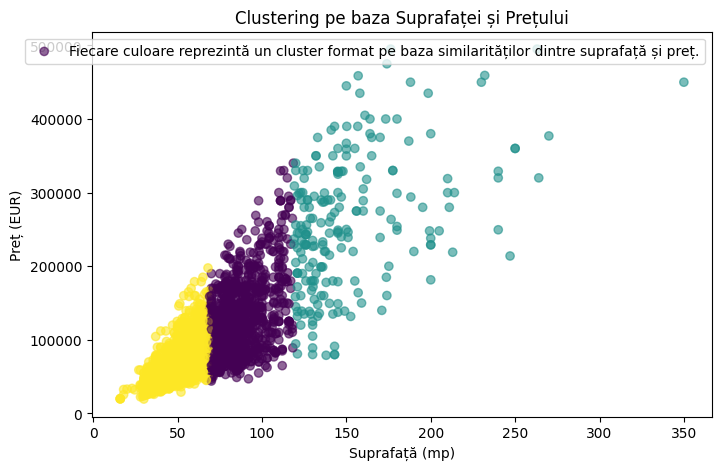

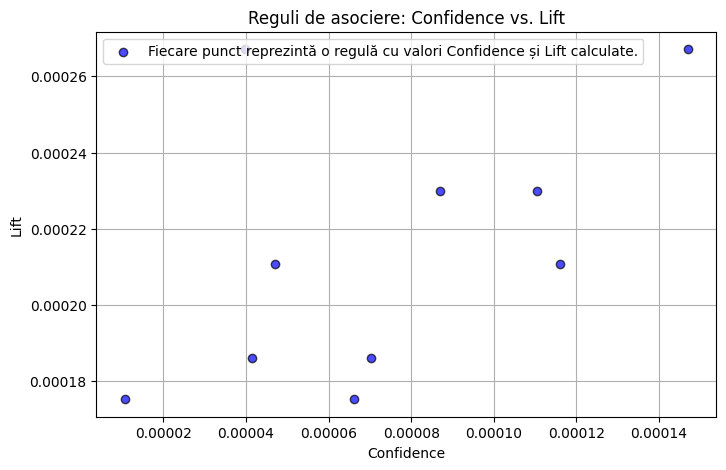

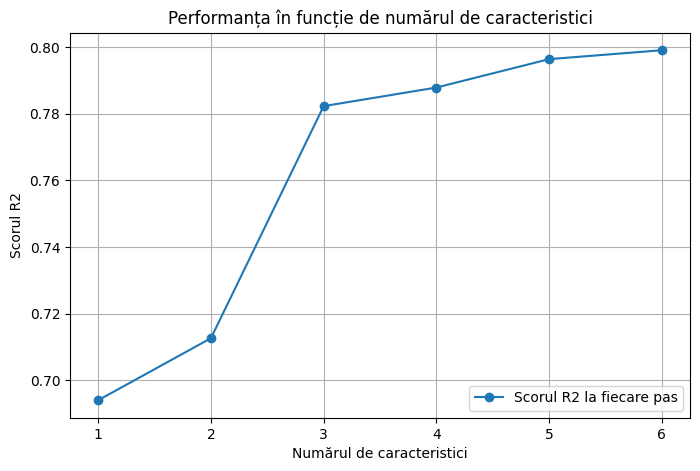

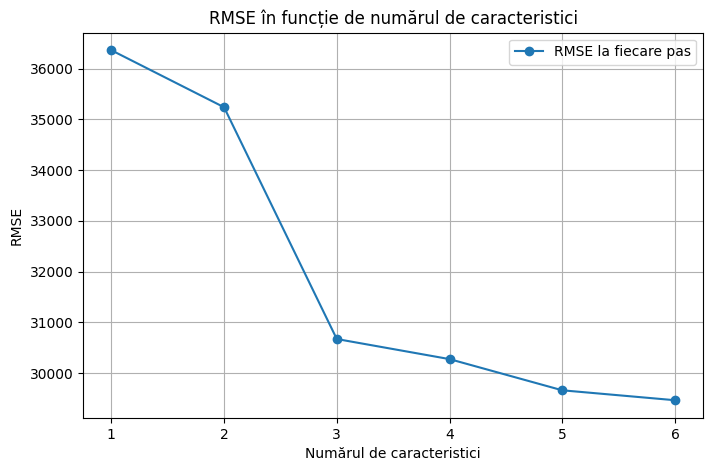

   Features          RMSE        R2  Training Time
0         1  36361.190653  0.694060       0.258699
1         2  35237.912398  0.712670       0.294940
2         3  30671.949077  0.782308       0.376693
3         4  30276.292164  0.787888       0.457111
4         5  29661.962128  0.796408       0.593620
5         6  29466.374725  0.799084       0.685799


In [2]:
# Importa bibliotecile necesare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from collections import defaultdict
from itertools import combinations
import time

# Am incarcat setul de date pentru analiza prețurilor proprietăților.
data = pd.read_csv('/kaggle/input/bucharest-house-price-dataset/Bucharest_HousePriceDataset.csv')

# Am analizat setul de date
print(data.info())
print(data.describe())
print(data.head())

# Vizualizare: Distributia preturilor
plt.figure(figsize=(8, 5))
plt.hist(data['Pret'], bins=30, edgecolor='k', alpha=0.7)
plt.title("Distributia Preturilor Proprietatilor")
plt.xlabel("Pret (EUR)")
plt.ylabel("Frecventa")
plt.legend(["Fiecare bara reprezinta frecventa unei categorii de preturi (EUR)."], loc="upper right")
plt.show()

# Vizualizare: Relatia dintre Suprafata si Pret
plt.figure(figsize=(8, 5))
plt.scatter(data['Suprafata'], data['Pret'], alpha=0.6)
plt.title("Relatia dintre Suprafata si Pret")
plt.xlabel("Suprafata (mp)")
plt.ylabel("Pret (EUR)")
plt.legend(["Fiecare punct reprezinta o proprietate, cu Suprafata pe axa X si Pretul pe axa Y."], loc="upper left")
plt.show()

# Am pregatit datele: selectat caracteristicile relevante si am impartit seturile de antrenament si test
features = ['Nr Camere', 'Suprafata', 'Etaj', 'Total Etaje', 'Sector', 'Scor']
target = 'Pret'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes: Antrenat pe date scalate.
#Rezultatele includ RMSE (eroarea medie pătratică) și R2 (calitatea predicțiilor).
nb_model = GaussianNB()
start_time_nb = time.time()
nb_model.fit(X_train_scaled, y_train)
nb_predictions = nb_model.predict(X_test_scaled)
nb_time = time.time() - start_time_nb

nb_rmse = mean_squared_error(y_test, nb_predictions, squared=False)
nb_r2 = r2_score(y_test, nb_predictions)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
start_time_dt = time.time()
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
dt_time = time.time() - start_time_dt

#RMSE: Cu cât mai mic, cu atât mai bine.
#R2: Valori apropiate de 1 indică predicții bune.
#Timpul de antrenare.
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
dt_r2 = r2_score(y_test, dt_predictions)

print(f"Naive Bayes - RMSE: {nb_rmse}, R2: {nb_r2}, Training Time: {nb_time}s")
print(f"Decision Tree - RMSE: {dt_rmse}, R2: {dt_r2}, Training Time: {dt_time}s")

# Vizualizare rezultate modele
models = ['Naive Bayes', 'Decision Tree']
rmse_scores = [nb_rmse, dt_rmse]
r2_scores = [nb_r2, dt_r2]
training_times = [nb_time, dt_time]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color=['blue', 'green'], alpha=0.7)
plt.title("Compararea RMSE pentru modele")
plt.ylabel("RMSE")
plt.legend(["RMSE: eroarea medie patratica a predictiilor pentru fiecare model."], loc="upper right")
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'green'], alpha=0.7)
plt.title("Compararea R2 pentru modele")
plt.ylabel("R2 Score")
plt.legend(["R2: scorul de determinare, indicand cat de bine se potrivesc predictiile modelelor datelor reale."], loc="upper left")
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(models, training_times, color=['blue', 'green'], alpha=0.7)
plt.title("Compararea timpului de antrenare pentru modele")
plt.ylabel("Timp (secunde)")
plt.legend(["Timpul necesar pentru antrenarea fiecarui model."], loc="upper right")
plt.show()

# Clustering
#Folosesc KMeans pentru a grupa proprietățile în funcție de suprafață și preț.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(8, 5))
scatter = plt.scatter(X['Suprafata'], y, c=clusters, cmap='viridis', alpha=0.6)
plt.title("Clustering pe baza Suprafatei si Pretului")
plt.xlabel("Suprafata (mp)")
plt.ylabel("Pret (EUR)")
plt.legend(*scatter.legend_elements(), title="Clustere")
plt.legend(["Fiecare culoare reprezinta un cluster format pe baza similaritatilor dintre suprafata si pret."], loc="upper right")
plt.show()

# Apriori - Frecventa 
#Algoritmul identifică frecvența combinațiilor de caracteristici (Sector, Nr Camere).

def apriori(transactions, min_support):
    item_count = defaultdict(int)
    transaction_count = len(transactions)

    for transaction in transactions:
        for item in transaction:
            item_count[frozenset([item])] += 1

    itemsets = {itemset: count / transaction_count for itemset, count in item_count.items() if count / transaction_count >= min_support}
    results = []

    k = 2
    while itemsets:
        results.extend([(list(itemset), support) for itemset, support in itemsets.items()])
        candidates = defaultdict(int)

        for transaction in transactions:
            for itemset in combinations(transaction, k):
                itemset = frozenset(itemset)
                if all(frozenset(subset) in itemsets for subset in combinations(itemset, k - 1)):
                    candidates[itemset] += 1

        itemsets = {itemset: count / transaction_count for itemset, count in candidates.items() if count / transaction_count >= min_support}
        k += 1

    return results

transactions = data[['Sector', 'Nr Camere']].astype(str).values.tolist()
min_support = 0.01
frequent_itemsets = apriori(transactions, min_support)

rules = []
for itemset, support in frequent_itemsets:
    if len(itemset) > 1:
        for i in range(len(itemset)):
            antecedent = itemset[:i] + itemset[i + 1:]
            consequent = [itemset[i]]
            confidence = support / sum(1 for t in transactions if set(antecedent).issubset(t))
            lift = confidence / (sum(1 for t in transactions if set(consequent).issubset(t)) / len(transactions))
            rules.append((antecedent, consequent, confidence, lift))

rules_df = pd.DataFrame(rules, columns=['Antecedent', 'Consequent', 'Confidence', 'Lift'])
rules_df = rules_df.sort_values(by='Lift', ascending=False).head(10)

#Confidence: Probabilitatea ca un set de caracteristici să apară împreună.
#Lift: Creșterea probabilității față de o distribuție aleatorie.
plt.figure(figsize=(8, 5))
plt.scatter(rules_df['Confidence'], rules_df['Lift'], alpha=0.7, c='blue', edgecolor='k')
plt.title("Reguli de asociere: Confidence vs. Lift")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.legend(["Fiecare punct reprezinta o regula cu valori Confidence si Lift calculate."], loc="upper left")
plt.grid(True)
plt.show()

# Reducerea caracteristicilor
#Se folosesc mai puține caracteristici pentru a evalua impactul asupra performanței.
#Se măsoară RMSE și R2 pentru fiecare subset de caracteristici.

results = []
for k in range(1, len(features) + 1):
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_k = selector.fit_transform(X_train_scaled, y_train)
    X_test_k = selector.transform(X_test_scaled)

    rf_model = RandomForestRegressor(random_state=42)
    start_time_rf = time.time()
    rf_model.fit(X_train_k, y_train)
    rf_time = time.time() - start_time_rf
    rf_predictions = rf_model.predict(X_test_k)

    rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
    rf_r2 = r2_score(y_test, rf_predictions)

    results.append({"Features": k, "RMSE": rf_rmse, "R2": rf_r2, "Training Time": rf_time})

results_df = pd.DataFrame(results)

plt.figure(figsize=(8, 5))
plt.plot(results_df['Features'], results_df['R2'], marker='o')
plt.title("Performanta in functie de numarul de caracteristici")
plt.xlabel("Numarul de caracteristici")
plt.ylabel("Scorul R2")
plt.legend(["Scorul R2 la fiecare pas"], loc="lower right")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(results_df['Features'], results_df['RMSE'], marker='o')
plt.title("RMSE in functie de numarul de caracteristici")
plt.xlabel("Numarul de caracteristici")
plt.ylabel("RMSE")
plt.legend(["RMSE la fiecare pas"], loc="upper right")
plt.grid(True)
plt.show()

print(results_df)
